# Exercício - Mini Projeto de Análise de Dados

Vamos fazer um exercício completo de pandas para um miniprojeto de análise de dados.

Esse exercício vai obrigar a gente a usar boa parte dos conhecimento de pandas e até de outros módulos que já aprendemos ao longo do curso.

### O que temos?

Temos os dados de 2019 de uma empresa de prestação de serviços.

- CadastroFuncionarios
- CadastroClientes
- BaseServiçosPrestados

Obs1: Para ler arquivos csv, temos o read_csv<br>
Obs2: Para ler arquivos xlsx (arquivos em excel normais, que não são padrão csv), temos o read_excel

### O que queremos saber/fazer?

1. Valor Total da Folha Salarial -> Qual foi o gasto total com salários de funcionários pela empresa? <br>
    Sugestão: calcule o salário total de cada funcionário, salário + benefícios + impostos, depois some todos os salários
    
    
2. Qual foi o faturamento da empresa?<br>
    Sugestão: calcule o faturamento total de cada serviço e depois some o faturamento de todos
    
    
3. Qual o % de funcionários que já fechou algum contrato?<br>
    Sugestão: na base de serviços temos o funcionário que fechou cada serviço. Mas nem todos os funcionários que a empresa tem já fecharam algum serviço.<br>
    . Na base de funcionários temos uma lista com todos os funcionários<br>
    . Queremos calcular Qtde_Funcionarios_Fecharam_Serviço / Qtde_Funcionários_Totais<br>
    . Para calcular a qtde de funcionários que fecharam algum serviço, use a base de serviços e conte quantos funcionários tem ali. Mas lembre-se, cada funcionário só pode ser contado uma única vez.<br><br>
    Dica: se você aplicar o método .unique() em uma variável que é apenas 1 coluna de um dataframe, ele vai excluir todos os valores duplicados daquela coluna.<br>
    Ex: unicos_colunaA = dataframe['colunaA'].unique() te dá como resposta uma lista com todos os itens da colunaA aparecendo uma única vez. Todos os valores repetidos da colunaA são excluidos da variável unicos_colunaA
    
    
4. Calcule o total de contratos que cada área da empresa já fechou


5. Calcule o total de funcionários por área


6. Qual o ticket médio mensal (faturamento médio mensal) dos contratos?<br>
    Dica: .mean() calcula a média -> exemplo: media_colunaA = dataframe['colunaA'].mean()

Obs: Lembrando as opções mais usuais de encoding:<br>
encoding='latin1', encoding='ISO-8859-1', encoding='utf-8' ou então encoding='cp1252'

Observação Importante: Se o seu código der um erro na hora de importar os arquivos:<br>
- CadastroClientes.csv
- CadastroFuncionarios.csv

Use separador ";" (ponto e vírgula) para resolver

In [ ]:
import pandas as pd

servicos_df = pd.read_excel('BaseServicosPrestados.xlsx')
clientes_df = pd.read_csv('CadastroClientes.csv', sep=';')
funcionarios_df = pd.read_csv('CadastroFuncionarios.csv', sep=';', decimal=',')

display(servicos_df)
display(clientes_df)
display(funcionarios_df)

,Codigo do Servico,ID Funcionário,ID Cliente,Tempo Total de Contrato (Meses)
0,OS0001,67,1,14
1,OS0002,17,2,12
2,OS0003,116,4,14
3,OS0004,37,5,8
4,OS0005,130,6,8
...,...,...,...,...
232,OS0233,111,315,4
233,OS0234,124,316,8
234,OS0235,72,317,6
235,OS0236,90,319,14


,ID Cliente,Cliente,Valor Contrato Mensal
0,1,Teixeira Gonçalves,540
1,2,Souza Santos,1260
2,3,Emídio Alves,3195
3,4,Santos Costa,2520
4,5,Do Monteiro,3510
...,...,...,...
315,316,Manoel Costa,3690
316,317,Gomes Machado,2385
317,318,Alkindar Cardozo,3510
318,319,Pereira Fazenda,4185


,ID Funcionário,Estado Civil,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Cargo,Area
0,1,C,Gabriel Mesquita,21910,10955.0,4382.0,242,719.04,Diretor,Operações
1,2,C,João Haddad,5404,2702.0,1080.8,154,574.56,Estagiário,Logística
2,3,C,Amanda Marques Ribeiro,16066,8033.0,3213.2,154,729.12,Estagiário,Administrativo
3,4,C,Guilherme Nunez,21305,10652.5,4261.0,220,524.16,Analista,Administrativo
4,5,C,Adelino Gomes,5098,2549.0,1019.6,176,725.76,Analista,Administrativo
...,...,...,...,...,...,...,...,...,...,...
109,143,C,Renan Scharnhorst Ott,10793,5396.5,2158.6,242,514.08,Analista,Logística
110,144,S,Lucas Brum Pereira,4048,2024.0,809.6,198,796.32,Estagiário,Comercial
111,148,S,Caio Stellet,24596,12298.0,4919.2,242,561.12,Analista,Administrativo
112,149,C,Fernanda Rocha,5078,2539.0,1015.6,308,665.28,Estagiário,Comercial


In [ ]:
#1. Valor Total da Folha Salarial

funcionarios_df['Remuneração Total'] = funcionarios_df['Salario Base'] + funcionarios_df['Impostos'] + funcionarios_df['Beneficios'] + funcionarios_df['VT'] + funcionarios_df['VR']

#Reordenando colunas
funcionarios_df = funcionarios_df[['ID Funcionário', 'Nome Completo', 'Area', 'Salario Base', 'Impostos', 'Beneficios', 'VT', 'VR', 'Remuneração Total']]

display(funcionarios_df.head())
total_folha = funcionarios_df['Remuneração Total'].sum()
print(f'\nValor Total da Folha Salarial Mensal:\nR$ {total_folha:,}')

,ID Funcionário,Nome Completo,Area,Salario Base,Impostos,Beneficios,VT,VR,Remuneração Total
0,1,Gabriel Mesquita,Operações,21910,10955.0,4382.0,242,719.04,38208.04
1,2,João Haddad,Logística,5404,2702.0,1080.8,154,574.56,9915.36
2,3,Amanda Marques Ribeiro,Administrativo,16066,8033.0,3213.2,154,729.12,28195.32
3,4,Guilherme Nunez,Administrativo,21305,10652.5,4261.0,220,524.16,36962.66
4,5,Adelino Gomes,Administrativo,5098,2549.0,1019.6,176,725.76,9568.36



Valor Total da Folha Salarial:
R$ 2,717,493.22


In [ ]:
#2. Qual foi o faturamento da empresa?

clientes_df = clientes_df.merge(servicos_df,on='ID Cliente')
clientes_df = clientes_df[['ID Funcionário', 'ID Cliente', 'Cliente', 'Valor Contrato Mensal', 'Tempo Total de Contrato (Meses)']]

clientes_df['Valor Total do Contrato'] = clientes_df['Valor Contrato Mensal'] * clientes_df['Tempo Total de Contrato (Meses)']

faturamento = clientes_df['Valor Total do Contrato'].sum()

display(clientes_df.head())
print(f'\nFaturamento da empresa:\nR$ {faturamento:,.2f}')

,ID Funcionário,ID Cliente,Cliente,Valor Contrato Mensal,Tempo Total de Contrato (Meses),Valor Total do Contrato
0,67,1,Teixeira Gonçalves,540,14,7560
1,17,2,Souza Santos,1260,12,15120
2,116,4,Santos Costa,2520,14,35280
3,37,5,Do Monteiro,3510,8,28080
4,130,6,Soares Lobo,2340,8,18720



Faturamento da empresa:
R$ 5,519,160.00


In [ ]:
#3. Qual o % de funcionários que já fechou algum contrato?

servicos_df = servicos_df.merge(funcionarios_df[['ID Funcionário', 'Area']], on='ID Funcionário')

qtd_fechou = len(servicos_df['ID Funcionário'].unique())

total_funcionarios = len(funcionarios_df['ID Funcionário'])

print(f'{qtd_fechou / total_funcionarios:.2%} dos funcionários já fecharam algum contrato')

86.84% dos funcionários já fecharam algum contrato


,count
Area,
Administrativo,63
Operações,48
Comercial,44
Financeiro,42
Logística,40


<Axes: title={'center': 'Contratos Por Área'}, xlabel='Area'>

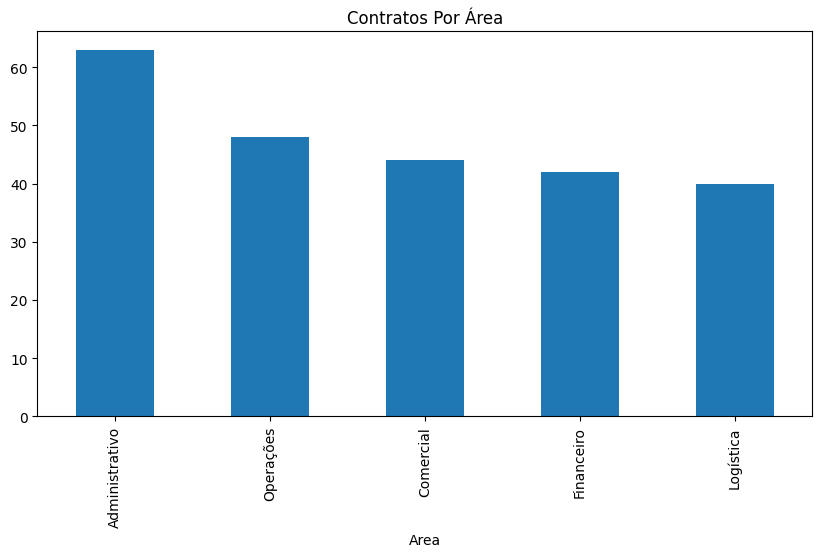

In [ ]:
#4. Calcule o total de contratos que cada área da empresa já fechou

contratos_por_area = servicos_df['Area'].value_counts()

display(contratos_por_area)
contratos_por_area.plot(figsize=(10,5), kind='bar', title='Contratos Por Área')

,count
Area,
Administrativo,26
Comercial,26
Operações,23
Logística,21
Financeiro,18


<Axes: title={'center': 'Funcionários Por Área'}, xlabel='Area'>

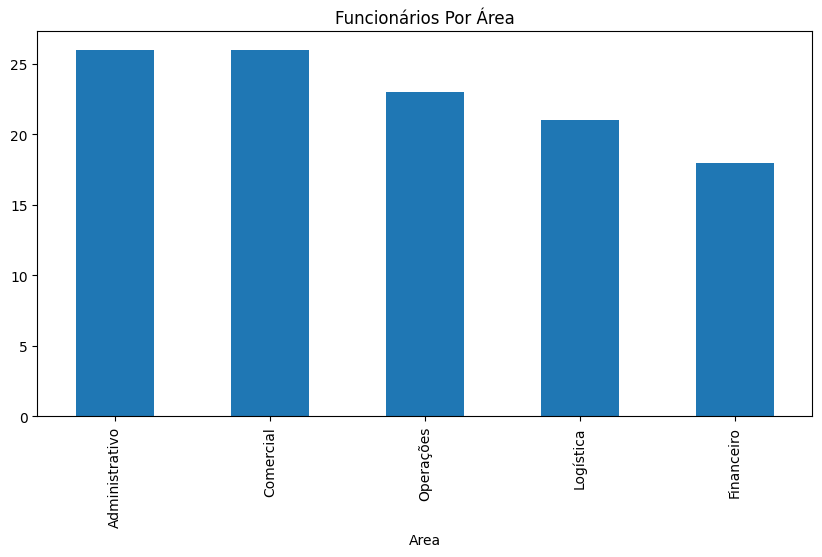

In [ ]:
#5. Calcule o total de funcionários por área

funcionarios_por_area = funcionarios_df['Area'].value_counts()

display(funcionarios_por_area)
funcionarios_por_area.plot(figsize=(10,5), kind='bar', title='Funcionários Por Área')

In [ ]:
# 6. Qual o ticket médio mensal (faturamento médio mensal) dos contratos?

ticket_medio_mensal = clientes_df['Valor Contrato Mensal'].mean()

print(f'\nTicket Médio Mensal dos Contratos:\nR$ {ticket_medio_mensal:,.2f}')


Ticket Médio Mensal dos Contratos:
R$ 2,438.35


In [ ]:
with pd.ExcelWriter('Desafio1 Pandas.xlsx') as writer:
    clientes_df.to_excel(writer, sheet_name='BaseClientes', index=False)
    funcionarios_df.to_excel(writer, sheet_name='BaseFuncionários', index=False)
    servicos_df.to_excel(writer, sheet_name='BaseVendas', index=False)